In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.array([1,2,3,4,5,6]).reshape(-1,1)
y=np.array([35,40,50,60,65,70])

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [4]:
model=LinearRegression()
model.fit(X_train,y_train)

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [ ]:
print("GOOD FIT(Linear Regression)")
print("Train MSE:",mean_squared_error(y_train,y_train_pred))
print("Train r2:",r2_score(y_train_pred,y_train))

Train MSE: 1.875
Train r2: 0.9644970414201184


Text(0, 0.5, 'Marks')

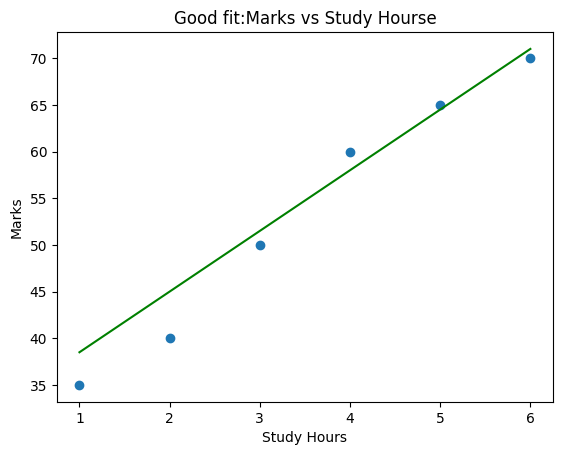

In [8]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='green')
plt.title("Good fit:Marks vs Study Hourse")
plt.xlabel("Study Hours")
plt.ylabel("Marks")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

overfit_model=LinearRegression()
overfit_model.fit(X_train_poly,y_train)

y_train_pred_poly=overfit_model.predict(X_train_poly)
y_test_pred_poly=overfit_model.predict(X_test_poly)

In [10]:
print("OVERFITTING MODEL(Polynomial degree=5)")
print("Train MSE:",mean_squared_error(y_train_pred_poly,y_train))
print("Train r2:",r2_score(y_train_pred_poly,y_train))

OVERFITTING MODEL(Polynomial degree=5)
Train MSE: 8.23880018525583e-24
Train r2: 1.0


In [12]:
from sklearn.linear_model import Ridge

X_poly=poly.fit_transform(X)
ridge=Ridge(alpha=1)
ridge.fit(X_poly,y)
y_ridge_pred=ridge.predict(X_poly)

In [14]:
print("Ridge MSE:",mean_squared_error(y_ridge_pred,y))
print("Ridge r2:",r2_score(y_ridge_pred,y))

Ridge MSE: 0.24058058055628095
Ridge r2: 0.9985238893854784


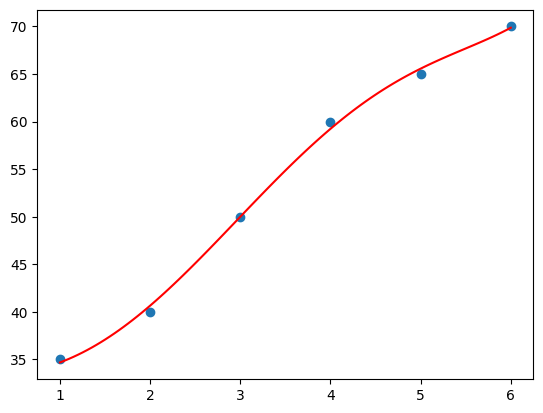

In [18]:
X_grid=np.linspace(1,6,100).reshape(-1,1)
X_grid_poly=poly.fit_transform(X_grid)

y_grid_poly_pred=ridge.predict(X_grid_poly)
plt.scatter(X,y)
plt.plot(X_grid,y_grid_poly_pred,color='red')

In [19]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.1)
lasso.fit(X_poly,y)

y_lasso_pred=lasso.predict(X_poly)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


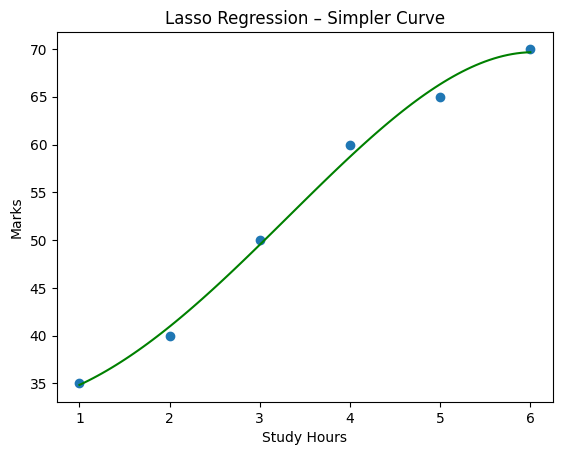

In [20]:
plt.scatter(X, y)
plt.plot(X_grid, lasso.predict(X_grid_poly), color='green')
plt.title("Lasso Regression – Simpler Curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred))
print("Ridge R² :", r2_score(y, y_ridge_pred))

print("\nLasso MSE:", mean_squared_error(y, y_lasso_pred))
print("Lasso R² :", r2_score(y, y_lasso_pred))


Ridge MSE: 0.24058058055628095
Ridge R² : 0.9985320506949108

Lasso MSE: 0.7727384155729786
Lasso R² : 0.9952849859388767
